In [1]:
from PyDSTool import *
from PyDSTool.Toolbox import phaseplane as pp
from matplotlib import pyplot as plt
from IPython.display import display, Math

In [2]:
dir = './figures/chapter4/'
plt.rc('text', usetex=True)

# Saddle-node bifurcation after transforming one parameters into a variable

## One-dimensional case

### Example 1:
$$f(x,a;b)=-a-b-x^2$$

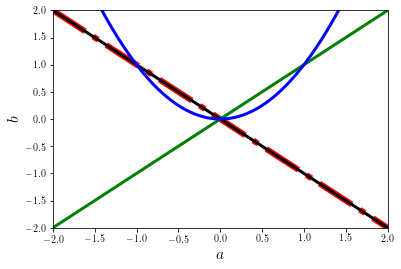

In [3]:
aa = np.arange(-2, 2, 0.01)
plt.plot(aa, -aa, lw=6, ls='-.', color='r')
plt.plot(aa, -aa, lw=3, ls='-', color='k')
plt.plot(aa, aa, lw=3, ls='-', color='g')
plt.plot(aa, aa**2, lw=3, ls='-', color='b')
plt.xlabel('$a$', fontsize=16)
plt.ylabel('$b$', fontsize=16)
plt.axis([-2, 2, -2, 2])
plt.savefig(dir + 'Example1TwoParsBif.pdf', bbox_inches='tight')
plt.show()

**Second case**
$$x'=f(x,a;b)=-a-b-x^2\\
a'=g(a;b)=a-b$$

In [4]:
xstr = '-a-b-x**2'
astr = '-a+b'
params = {'b': -1}
ics = {'x': sqrt(2), 'a': -1}
DSargs = args(name='EX12')
DSargs.pars = params
DSargs.tdata = [0, 10]
DSargs.pdomain = {'b': [-2, 2]}
DSargs.xdomain = {'x': [-1e4, 1e4], 'a': [-2, 2]}
DSargs.varspecs = {'x': xstr, 'a': astr}
DSargs.ics = ics
DS = Generator.Vode_ODEsystem(DSargs)

In [5]:
PC = ContClass(DS)
name1 = 'EQ1'
PCargs = args(name=name1)
PCargs.type = 'EP-C'
PCargs.freepars = ['b']
PCargs.StepSize = 1e-3
PCargs.MaxNumPoints = 800
PCargs.MaxStepSize = 5e-2
PCargs.MinStepSize = 1e-6
PCargs.MaxTestIters = 20
PCargs.LocBifPoints = 'all'
PCargs.SaveEigen = True
PCargs.StopAtPoints = ['B']
PCargs.verbosity = 2

PC.newCurve(PCargs)
PC.curves[name1].backward()
PC.curves[name1].forward()

B Point found 
0 : 
a  =  -2.00000000967
x  =  2.00000000483
b  =  -2.00000000967


Checking...
  |q| = 1.000000
  <p,q> = 1.000000
  |Aq| = 0.000000
  |transpose(A)p| = 0.000000

LP Point found 
0 : 
a  =  -4.73334645065e-17
x  =  -9.7296931613e-09
b  =  -4.73334645065e-17

Eigenvalues = 

     (0.000000,0.000000)
     (-1.000000,0.000000)


a = 0.99999999999999989

Neutral saddle found!

B Point found 
0 : 
a  =  -2.00000001275
x  =  -2.00000000638
b  =  -2.00000001275



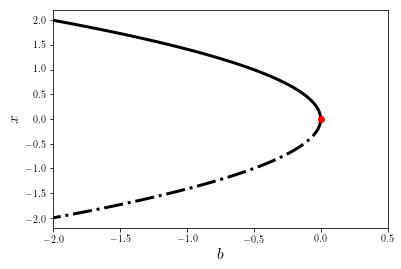

In [6]:
PC['EQ1'].display(('b', 'x'), stability=True, linewidth=3)
PC.plot.toggleLabels('off')
PC.plot.fig1.toggleAll('off', bytype=['P','B'])
PC.plot.fig1.axes1.axes.set_xlim((-2, 0.5))
PC.plot.fig1.axes1.axes.set_xlabel('$b$', fontsize=16)
PC.plot.fig1.axes1.axes.set_ylabel('$x$', fontsize=16)
PC.plot.fig1.axes1.axes.set_title('')
plt.savefig(dir + 'Example1Case2.pdf', bbox_inches='tight')
plt.show()

**Third case**
$$x'=f(x,a;b)=-a-b-x^2\\
a'=g(a;b)=a^2-b$$

In [7]:
xstr = '-a-b-x**2'
astr = 'a**2-b'
params = {'b': 1/4}
ics = {'x': -1/2, 'a': -1/2}
DSargs = args(name='EX13')
DSargs.pars = params
DSargs.tdata = [0, 10]
DSargs.pdomain = {'b': [-2, 2]}
DSargs.xdomain = {'x': [-1e4, 1e4], 'a': [-2, 2]}
DSargs.varspecs = {'x': xstr, 'a': astr}
DSargs.ics = ics
DS = Generator.Vode_ODEsystem(DSargs)

In [8]:
PC = ContClass(DS)
name1 = 'EQ1'
PCargs = args(name=name1)
PCargs.type = 'EP-C'
PCargs.freepars = ['b']
PCargs.StepSize = 1e-3
PCargs.MaxNumPoints = 60
PCargs.MaxStepSize = 5e-2
PCargs.MinStepSize = 1e-6
PCargs.MaxTestIters = 20
PCargs.LocBifPoints = 'all'
PCargs.SaveEigen = True
PCargs.StopAtPoints = ['B']
PCargs.verbosity = 2

PC.newCurve(PCargs)
PC.curves[name1].backward()
PC.curves[name1].forward()

Neutral saddle found!


Checking...
  |q| = 1.000000
  <p,q> = 1.000000
  |Aq| = 0.000000
  |transpose(A)p| = 0.000000

LP Point found 
0 : 
a  =  -1.0
x  =  5.269796859e-09
b  =  1.0

Eigenvalues = 

     (-0.000000,0.000000)
     (-2.000000,0.000000)


a = 1.0000000000000002

Fold-Fold point found in Hopf!


Checking...
  |q| = 1.000000
  <p,q> = 1.000000
  |Aq| = 0.000001
  |transpose(A)p| = 0.000744

LP Point found 
0 : 
a  =  -5.54402157714e-07
x  =  -0.000744581661305
b  =  3.07361752478e-13

Eigenvalues = 

     (0.001489,0.000000)
     (-0.000001,0.000000)


a = 0.0014902704720478758



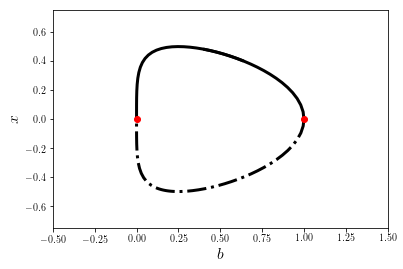

In [9]:
PC['EQ1'].display(('b', 'x'), stability=True, linewidth=3)
PC.plot.toggleLabels('off')
PC.plot.fig1.toggleAll('off', bytype=['P','B'])
PC.plot.fig1.axes1.axes.set_xlim((-0.5, 1.5))
PC.plot.fig1.axes1.axes.set_xlabel('$b$', fontsize=16)
PC.plot.fig1.axes1.axes.set_ylim((-0.75, 0.75))
PC.plot.fig1.axes1.axes.set_ylabel('$x$', fontsize=16)
PC.plot.fig1.axes1.axes.set_title('')
plt.savefig(dir + 'Example1Case3.pdf', bbox_inches='tight')
plt.show()

### Example 2
$$f(x,a;b)=b^2+1-a-x^2$$

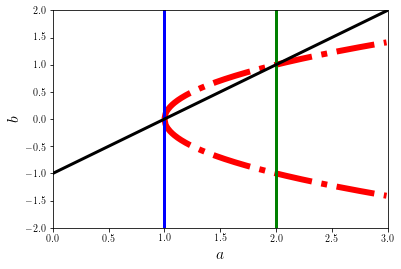

In [10]:
aa = np.arange(1, 3, 0.01)
plt.plot(aa, sqrt(aa-1), lw=6, ls='-.', color='r')
plt.plot(aa, -sqrt(aa-1), lw=6, ls='-.', color='r')
plt.axvline(x=2, lw=3, color='g')
plt.axvline(x=1, lw=3, color='b')
aa = np.arange(0, 3, 0.01)
plt.plot(aa, aa-1, lw=3, color='k')
plt.xlabel('$a$', fontsize=16)
plt.ylabel('$b$', fontsize=16)
plt.axis([0, 3, -2, 2])
plt.savefig(dir + 'Example2TwoParsBif.pdf', bbox_inches='tight')
plt.show()

**Case 1**
$$g(a;b)=-a+2$$

In [55]:
xstr = 'b^2+1-a-x**2'
astr = '-a+2'
params = {'b': 2}
ics = {'x': sqrt(3), 'a': 2}
DSargs = args(name='EX22')
DSargs.pars = params
DSargs.tdata = [0, 10]
DSargs.pdomain = {'b': [-4, 4]}
DSargs.xdomain = {'x': [-1e4, 1e4], 'a': [-4, 4]}
DSargs.varspecs = {'x': xstr, 'a': astr}
DSargs.ics = ics
DS = Generator.Vode_ODEsystem(DSargs)

In [56]:
PC = ContClass(DS)
name1 = 'EQ1'
PCargs = args(name=name1)
PCargs.type = 'EP-C'
PCargs.initpoint = {'x': sqrt(3), 'a': 2, 'b': 2}
PCargs.freepars = ['b']
PCargs.StepSize = 1e-3
PCargs.MaxNumPoints = 200
PCargs.MaxStepSize = 5e-2
PCargs.MinStepSize = 1e-6
PCargs.MaxTestIters = 20
PCargs.LocBifPoints = 'all'
PCargs.SaveEigen = True
PCargs.StopAtPoints = ['B']
PCargs.verbosity = 2

PC.newCurve(PCargs)
PC.curves[name1].backward()
PC.curves[name1].forward()


Checking...
  |q| = 1.000000
  <p,q> = 1.000000
  |Aq| = 0.000000
  |transpose(A)p| = 0.000000

LP Point found 
0 : 
a  =  2.0
x  =  -1.56375748616e-08
b  =  1.0

Eigenvalues = 

     (0.000000,0.000000)
     (-1.000000,0.000000)


a = 1.0000000000000002

Neutral saddle found!

B Point found 
0 : 
a  =  2.0
x  =  -3.87298335392
b  =  4.00000000746

B Point found 
0 : 
a  =  2.0
x  =  3.87298335173
b  =  4.00000000535



In [57]:
name2 = 'EQ2'
PCargs = args(name=name2)
PCargs.type = 'EP-C'
PCargs.initpoint = {'x': sqrt(3), 'a': 2, 'b': -2}
PCargs.freepars = ['b']
PCargs.values
PCargs.StepSize = 1e-3
PCargs.MaxNumPoints = 200
PCargs.MaxStepSize = 5e-2
PCargs.MinStepSize = 1e-6
PCargs.MaxTestIters = 20
PCargs.LocBifPoints = 'all'
PCargs.SaveEigen = True
PCargs.StopAtPoints = ['B']
PCargs.verbosity = 2

PC.newCurve(PCargs)
PC.curves[name2].backward()
PC.curves[name2].forward()


Checking...
  |q| = 1.000000
  <p,q> = 1.000000
  |Aq| = 0.000000
  |transpose(A)p| = 0.000000

LP Point found 
0 : 
a  =  2.0
x  =  -1.56375748616e-08
b  =  -1.0

Eigenvalues = 

     (0.000000,0.000000)
     (-1.000000,0.000000)


a = 1.0000000000000002

Neutral saddle found!

B Point found 
0 : 
a  =  2.0
x  =  -3.87298335392
b  =  -4.00000000746

B Point found 
0 : 
a  =  2.0
x  =  3.87298335173
b  =  -4.00000000535



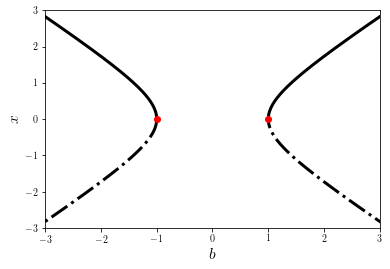

In [58]:
PC['EQ1'].display(('b', 'x'), stability=True, linewidth=3)
PC['EQ2'].display(('b', 'x'), stability=True, linewidth=3)
PC.plot.toggleLabels('off')
PC.plot.fig1.toggleAll('off', bytype=['P','B'])
# PC.plot.fig1.axes1.axes.set_yscale('log')
PC.plot.fig1.axes1.axes.set_xlim((-3, 3))
PC.plot.fig1.axes1.axes.set_xlabel('$b$', fontsize=16)
PC.plot.fig1.axes1.axes.set_ylim((-3, 3))
PC.plot.fig1.axes1.axes.set_ylabel('$x$', fontsize=16)
PC.plot.fig1.axes1.axes.set_title('')
plt.savefig(dir + 'Example2Case1.pdf', bbox_inches='tight')
plt.show()

**Case 2**
$$g(a;b)=-a+1$$

In [59]:
xstr = 'b^2+1-a-x**2'
astr = '-a+1'
params = {'b': -2}
ics = {'x': -2, 'a': 1}
DSargs = args(name='EX22')
DSargs.pars = params
DSargs.tdata = [0, 10]
DSargs.pdomain = {'b': [-4, 4]}
DSargs.xdomain = {'x': [-1e4, 1e4], 'a': [-4, 4]}
DSargs.varspecs = {'x': xstr, 'a': astr}
DSargs.ics = ics
DS = Generator.Vode_ODEsystem(DSargs)

In [60]:
PC = ContClass(DS)
name1 = 'EQ1'
PCargs = args(name=name1)
PCargs.type = 'EP-C'
PCargs.initpoint = {'x': 2, 'a': 1, 'b': -2}
PCargs.freepars = ['b']
PCargs.StepSize = 1e-3
PCargs.MaxNumPoints = 200
PCargs.MaxStepSize = 5e-2
PCargs.MinStepSize = 1e-6
PCargs.MaxTestIters = 20
PCargs.LocBifPoints = 'all'
PCargs.SaveEigen = True
PCargs.StopAtPoints = ['B']
PCargs.verbosity = 2

PC.newCurve(PCargs)
PC.curves[name1].backward()
PC.curves[name1].forward()

BP Point found 
0 : 
a  =  1.00000000001
x  =  1.01335116568e-12
b  =  -2.89514710548e-11

Eigenvalues = 

     (-0.018252,0.000000)
     (-0.000000,0.000000)
     (-1.000000,0.000000)


branch angle = 0.66741832248828659
Test function #1: 7.9937717854455308e-11

Neutral saddle found!

B Point found 
0 : 
a  =  1.0
x  =  -4.00000000444
b  =  4.00000000444

B Point found 
0 : 
a  =  1.0
x  =  4.00000000468
b  =  -4.00000000468



In [61]:
name2 = 'EQ2'
PCargs = args(name=name2)
PCargs.type = 'EP-C'
PCargs.initpoint = {'x': -2, 'a': 1, 'b': -2}
PCargs.freepars = ['b']
PCargs.StepSize = 1e-3
PCargs.MaxNumPoints = 200
PCargs.MaxStepSize = 5e-2
PCargs.MinStepSize = 1e-6
PCargs.MaxTestIters = 20
PCargs.LocBifPoints = 'all'
PCargs.SaveEigen = True
PCargs.StopAtPoints = ['B']
PCargs.verbosity = 2

PC.newCurve(PCargs)
PC.curves[name2].backward()
PC.curves[name2].forward()

B Point found 
0 : 
a  =  1.0
x  =  -4.00000000468
b  =  -4.00000000468

Neutral saddle found!

BP Point found 
0 : 
a  =  1.00000000001
x  =  -1.03676298558e-12
b  =  4.50165921303e-11

Eigenvalues = 

     (-0.018673,0.000000)
     (0.000000,0.000000)
     (-1.000000,0.000000)


branch angle = -0.74552201310732613
Test function #1: 7.7038418615857205e-11

B Point found 
0 : 
a  =  1.0
x  =  4.00000000444
b  =  4.00000000444



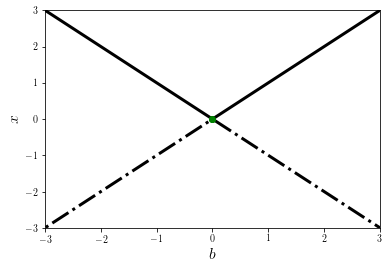

In [62]:
PC['EQ1'].display(('b', 'x'), stability=True, linewidth=3)
PC['EQ2'].display(('b', 'x'), stability=True, linewidth=3)
PC.plot.toggleLabels('off')
PC.plot.fig1.toggleAll('off', bytype=['P','B'])
PC.plot.fig1.axes1.axes.set_xlim((-3, 3))
PC.plot.fig1.axes1.axes.set_xlabel('$b$', fontsize=16)
PC.plot.fig1.axes1.axes.set_ylim((-3, 3))
PC.plot.fig1.axes1.axes.set_ylabel('$x$', fontsize=16)
PC.plot.fig1.axes1.axes.set_title('')
plt.savefig(dir + 'Example2Case2.pdf', bbox_inches='tight')
plt.show()

**Case 3**
$$g(a;b)=b-a+1$$

In [50]:
xstr = 'b^2+1-a-x**2'
astr = 'b-a+1'
params = {'b': 2}
ics = {'x': sqrt(2), 'a': 3}
DSargs = args(name='EX23')
DSargs.pars = params
DSargs.tdata = [0, 10]
DSargs.pdomain = {'b': [-4, 4]}
DSargs.xdomain = {'x': [-1e4, 1e4], 'a': [-6, 6]}
DSargs.varspecs = {'x': xstr, 'a': astr}
DSargs.ics = ics
DS = Generator.Vode_ODEsystem(DSargs)

In [51]:
PC = ContClass(DS)
name1 = 'EQ1'
PCargs = args(name=name1)
PCargs.type = 'EP-C'
PCargs.initpoint = {'x': sqrt(2), 'a': 3, 'b': 2}
PCargs.freepars = ['b']
PCargs.StepSize = 1e-3
PCargs.MaxNumPoints = 200
PCargs.MaxStepSize = 5e-2
PCargs.MinStepSize = 1e-6
PCargs.MaxTestIters = 20
PCargs.LocBifPoints = 'all'
PCargs.SaveEigen = True
PCargs.StopAtPoints = ['B']
PCargs.verbosity = 2

PC.newCurve(PCargs)
PC.curves[name1].backward()
PC.curves[name1].forward()


Checking...
  |q| = 1.000000
  <p,q> = 1.000000
  |Aq| = 0.000000
  |transpose(A)p| = 0.000000

LP Point found 
0 : 
a  =  2.0
x  =  -6.29666514174e-08
b  =  1.0

Eigenvalues = 

     (0.000000,0.000000)
     (-1.000000,0.000000)


a = 1.0000000000000002

Neutral saddle found!

B Point found 
0 : 
a  =  5.00000000444
x  =  -3.46410161962
b  =  4.00000000444

B Point found 
0 : 
a  =  5.00000000542
x  =  3.46410162061
b  =  4.00000000542



In [52]:
name2 = 'EQ2'
PCargs = args(name=name2)
PCargs.type = 'EP-C'
PCargs.initpoint = {'x': sqrt(2), 'a': 0, 'b': -1}
PCargs.freepars = ['b']
PCargs.values
PCargs.StepSize = 1e-3
PCargs.MaxNumPoints = 200
PCargs.MaxStepSize = 5e-2
PCargs.MinStepSize = 1e-6
PCargs.MaxTestIters = 20
PCargs.LocBifPoints = 'all'
PCargs.SaveEigen = True
PCargs.StopAtPoints = ['B']
PCargs.verbosity = 2

PC.newCurve(PCargs)
PC.curves[name2].backward()
PC.curves[name2].forward()

B Point found 
0 : 
a  =  -3.00000000364
x  =  4.47213595867
b  =  -4.00000000364


Checking...
  |q| = 1.000000
  <p,q> = 1.000000
  |Aq| = 0.000000
  |transpose(A)p| = 0.000000

LP Point found 
0 : 
a  =  1.0
x  =  -6.29666495429e-08
b  =  -4.04144106319e-15

Eigenvalues = 

     (0.000000,0.000000)
     (-1.000000,0.000000)


a = 1.0000000000000002

Neutral saddle found!



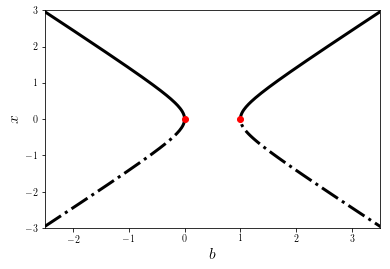

In [54]:
PC['EQ1'].display(('b', 'x'), stability=True, linewidth=3)
PC['EQ2'].display(('b', 'x'), stability=True, linewidth=3)
PC.plot.toggleLabels('off')
PC.plot.fig1.toggleAll('off', bytype=['P','B'])
PC.plot.fig1.axes1.axes.set_xlim((-2.5, 3.5))
PC.plot.fig1.axes1.axes.set_xlabel('$b$', fontsize=16)
PC.plot.fig1.axes1.axes.set_ylim((-3, 3))
PC.plot.fig1.axes1.axes.set_ylabel('$x$', fontsize=16)
PC.plot.fig1.axes1.axes.set_title('')
plt.savefig(dir + 'Example2Case3.pdf', bbox_inches='tight')
plt.show()

**Case 4**
$$\dot b = g(b;a)=b-a+1$$

In [45]:
xstr = 'b^2+1-a-x**2'
bstr = 'b-a+1'
params = {'a': 3}
ics = {'x': sqrt(2), 'b': 2}
DSargs = args(name='EX24')
DSargs.pars = params
DSargs.tdata = [0, 10]
DSargs.pdomain = {'a': [-6, 6]}
DSargs.xdomain = {'x': [-1e4, 1e4], 'b': [-6, 6]}
DSargs.varspecs = {'x': xstr, 'b': bstr}
DSargs.ics = ics
DS = Generator.Vode_ODEsystem(DSargs)

In [46]:
PC = ContClass(DS)
name1 = 'EQ1'
PCargs = args(name=name1)
PCargs.type = 'EP-C'
PCargs.initpoint = {'x': sqrt(2), 'b': 2, 'a': 3}
PCargs.freepars = ['a']
PCargs.StepSize = 1e-3
PCargs.MaxNumPoints = 200
PCargs.MaxStepSize = 5e-2
PCargs.MinStepSize = 1e-6
PCargs.MaxTestIters = 20
PCargs.LocBifPoints = 'all'
PCargs.SaveEigen = True
PCargs.StopAtPoints = ['B']
PCargs.verbosity = 2

PC.newCurve(PCargs)
PC.curves[name1].backward()
PC.curves[name1].forward()

Neutral saddle found!


Checking...
  |q| = 1.000000
  <p,q> = 1.000000
  |Aq| = 0.000000
  |transpose(A)p| = 0.000000

LP Point found 
0 : 
a  =  2.0
x  =  -6.2966647437e-08
b  =  1.0

Eigenvalues = 

     (0.000000,0.000000)
     (1.000000,0.000000)


a = 0.99999999999999989

B Point found 
0 : 
a  =  6.00000000259
x  =  4.47213595761
b  =  5.00000000259



In [47]:
name2 = 'EQ2'
PCargs = args(name=name2)
PCargs.type = 'EP-C'
PCargs.initpoint = {'x': sqrt(2), 'b': -1, 'a': 0}
PCargs.freepars = ['a']
PCargs.values
PCargs.StepSize = 1e-3
PCargs.MaxNumPoints = 200
PCargs.MaxStepSize = 5e-2
PCargs.MinStepSize = 1e-6
PCargs.MaxTestIters = 20
PCargs.LocBifPoints = 'all'
PCargs.SaveEigen = True
PCargs.StopAtPoints = ['B']
PCargs.verbosity = 2

PC.newCurve(PCargs)
PC.curves[name2].backward()
PC.curves[name2].forward()

B Point found 
0 : 
a  =  -5.00000000373
x  =  6.48074070215
b  =  -6.00000000373

Neutral saddle found!


Checking...
  |q| = 1.000000
  <p,q> = 1.000000
  |Aq| = 0.000000
  |transpose(A)p| = 0.000000

LP Point found 
0 : 
a  =  1.0
x  =  -6.29666474078e-08
b  =  -3.99420355372e-15

Eigenvalues = 

     (1.000000,0.000000)
     (0.000000,0.000000)


a = 1.0



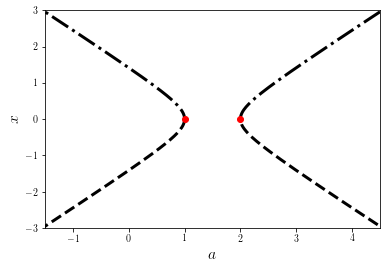

In [49]:
PC['EQ1'].display(('a', 'x'), stability=True, linewidth=3)
PC['EQ2'].display(('a', 'x'), stability=True, linewidth=3)
PC.plot.toggleLabels('off')
PC.plot.fig1.toggleAll('off', bytype=['P','B'])
PC.plot.fig1.axes1.axes.set_xlim((-1.5, 4.5))
PC.plot.fig1.axes1.axes.set_xlabel('$a$', fontsize=16)
PC.plot.fig1.axes1.axes.set_ylim((-3, 3))
PC.plot.fig1.axes1.axes.set_ylabel('$x$', fontsize=16)
PC.plot.fig1.axes1.axes.set_title('')
plt.savefig(dir + 'Example2Case4.pdf', bbox_inches='tight')
plt.show()

## $N$-dimensional case

### Example 3
$$x'=\mu-x^2+xy-xy^2$$
$$y'=\lambda-y-x^2+yx^2$$

In [24]:
xstr = 'mu - x**2 + x*y - x*y**2'
ystr = 'lambda -  y - x**2 + y*x**2'
params = {'mu': 0.1, 'lambda':0}
ics = {'x': 0.1, 'y': 0.1}
DSargs = args(name='EX3')
DSargs.pars = params
DSargs.tdata = [0, 10]
DSargs.pdomain = {'mu': [-4, 4], 'lambda': [-4, 4]}
DSargs.xdomain = {'x': [-1e4, 1e4], 'y': [-1e4, 1e4]}
DSargs.varspecs = {'x': xstr, 'y': ystr}
DSargs.ics = ics
DS = Generator.Vode_ODEsystem(DSargs)

In [25]:
fps = pp.find_fixedpoints(DS, n=4, eps=1e-8)
fps

({'x': 0.27504269322489472, 'y': -0.081839518530518768},
 {'x': -1.5011072448495351, 'y': 1.7978789438024105})

In [26]:
PC = ContClass(DS)
name1 = 'EQ1'
PCargs = args(name=name1)
PCargs.type = 'EP-C'
PCargs.initpoint = {'x': 0.27504269322489472, 'y': -0.081839518530518768}
PCargs.freepars = ['mu']
PCargs.StepSize = 1e-3
PCargs.MaxNumPoints = 800
PCargs.MaxStepSize = 5e-2
PCargs.MinStepSize = 1e-6
PCargs.MaxTestIters = 40
PCargs.LocBifPoints = 'all'
PCargs.SaveEigen = True
PCargs.StopAtPoints = ['B']
PCargs.verbosity = 2

PC.newCurve(PCargs)
PC.curves[name1].backward()
PC.curves[name1].forward()


Checking...
  |q| = 1.000000
  <p,q> = 1.000000
  |Aq| = 0.000001
  |transpose(A)p| = 0.000001

LP Point found 
0 : 
y  =  -1.00455109823e-13
x  =  -3.16946540954e-07
mu  =  1.00455077984e-13

Eigenvalues = 

     (0.000001,0.000000)
     (-1.000000,0.000000)


a = 0.99999904916097981


Checking...
  |q| = 1.000000
  <p,q> = 1.000000
  |Aq| = 0.000000
  |transpose(A)p| = 0.000001

LP Point found 
0 : 
y  =  -0.177774348898
x  =  -0.388511163739
mu  =  0.0695952074802

Eigenvalues = 

     (-0.000000,0.000000)
     (-0.281415,0.000000)


a = 4.4374653707739897

B Point found 
0 : 
y  =  -1.94626947259
x  =  -0.812765484811
mu  =  -4.00000001401

B Point found 
0 : 
y  =  -1.63137182301
x  =  0.787381793598
mu  =  4.0000000141



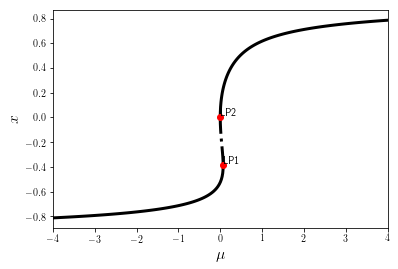

In [27]:
PC['EQ1'].display(('mu', 'x'), stability=True, linewidth=3)
PC.plot.fig1.toggleAll('off', bytype=['P','B'])
PC.plot.fig1.axes1.axes.set_xlim((-4, 4))
PC.plot.fig1.axes1.axes.set_xlabel('$\mu$', fontsize=16)
PC.plot.fig1.axes1.axes.set_ylabel('$x$', fontsize=16)
PC.plot.fig1.axes1.axes.set_title('')
# plt.savefig(dir + 'Example1Case2.pdf', bbox_inches='tight')
plt.show()

In [28]:
# Two-parameter bifurcation
namefold1 = 'F01'
PCargs = args(name=namefold1)
PCargs.type = 'LP-C'
PCargs.initpoint = 'EQ1:LP2'
PCargs.freepars = ['lambda', 'mu']
PCargs.StepSize = 1e-2
PCargs.MaxNumPoints = 200
PCargs.MaxStepSize = 5e-2
PCargs.MinStepSize = 1e-4
PCargs.SaveEigen = True
PCargs.SaveJacobian = True
PCargs.LocBifPoints = 'all'
PCargs.StopAtPoints = ['B']
PCargs.verbosity = 2
PC.newCurve(PCargs)

PC.curves[namefold1].forward()


Checking...
  |a| = -0.746381


CP Point found 
0 : 
y  =  1.37736196558
x  =  -0.355951709688
mu  =  -0.0583092714415
lambda  =  1.32954959335

Eigenvalues = 

     (-0.000000,0.000000)
     (-0.681159,0.000000)



Checking...
  <b,c> = 0.000000


BT Point found 
0 : 
y  =  1.36914567374
x  =  -0.58285001674
mu  =  0.0451334658126
lambda  =  1.24374166791

Eigenvalues = 

     (0.000011,0.000000)
     (-0.000011,0.000000)



Checking...
  |a| = -1.173862


CP Point found 
0 : 
y  =  0.672520604858
x  =  -1.05245265297
mu  =  1.33944522374
lambda  =  1.03525531391

Eigenvalues = 

     (2.432799,0.000000)
     (0.000000,0.000000)



Checking...
  <b,c> = -0.000000


BT Point found 
0 : 
y  =  -0.129280244349
x  =  -0.464921021285
mu  =  0.148276050365
lambda  =  0.114815437664

Eigenvalues = 

     (0.000001,0.000000)
     (-0.000001,0.000000)


Test function going crazy:  <PyDSTool.PyCont.TestFunc.CP_Fold object at 0x7f0b7e1e8390> 


Checking...
  |a| = -0.662563


CP Point found 
0 

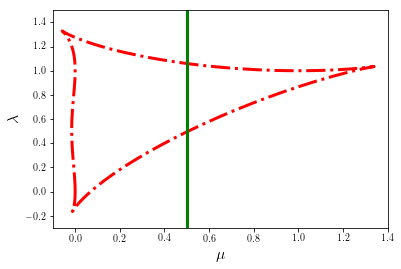

In [29]:
PC[namefold1].display(('mu', 'lambda'), stability=True, linewidth=3)
PC.plot.toggleLabels('off')
PC.plot.fig1.toggleAll('off', bytype=['P','BT','CP'])
PC.plot.fig1.axes1.axes.set_xlim((-0.1, 1.4))
PC.plot.fig1.axes1.axes.set_xlabel('$\mu$', fontsize=16)
PC.plot.fig1.axes1.axes.set_ylim((-0.3, 1.5))
PC.plot.fig1.axes1.axes.set_ylabel('$\lambda$', fontsize=16)
PC.plot.fig1.axes1.axes.set_title('')
plt.axvline(x=0.5, lw=3, color='g')
plt.savefig(dir + 'Example3TwoParBif.pdf', bbox_inches='tight')
plt.show()

**Extended system**

In [30]:
xstr = 'mu - x**2 + x*y - x*y**2'
ystr = 'lambda -  y - x**2 + y*x**2'
mustr = 'mu - 0.5'
params = {'lambda':0.5}
ics = {'x': 0.1, 'y': 0.1, 'mu': 0.6}
DSargs = args(name='EX32')
DSargs.pars = params
DSargs.tdata = [0, 10]
DSargs.pdomain = {'lambda': [0, 1.5]}
DSargs.xdomain = {'x': [-1e4, 1e4], 'y': [-1e4, 1e4], 'mu': [-4, 4]}
DSargs.varspecs = {'x': xstr, 'y': ystr, 'mu': mustr}
DSargs.ics = ics
DS = Generator.Vode_ODEsystem(DSargs)

In [31]:
fps = pp.find_fixedpoints(DS, n=4, eps=1e-8)
fps

({'mu': 0.5, 'x': -0.6542548769595159, 'y': 0.12579855937382364},
 {'mu': 0.5, 'x': 0.70710678118647341, 'y': 5.7000696238307165e-14},
 {'mu': 0.5, 'x': -0.70710678118654724, 'y': 4.9590562512261009e-16},
 {'mu': 0.5, 'x': -1.3496175169788096, 'y': 1.6086668495344683})

In [32]:
PC = ContClass(DS)
name1 = 'EQ1'
PCargs = args(name=name1)
PCargs.type = 'EP-C'
PCargs.initpoint = {'x': -0.70710678118647341, 'y': 0.0, 'mu': 0.5}
PCargs.freepars = ['lambda']
PCargs.StepSize = 1e-3
PCargs.MaxNumPoints = 800
PCargs.MaxStepSize = 5e-2
PCargs.MinStepSize = 1e-6
PCargs.MaxTestIters = 40
PCargs.LocBifPoints = 'all'
PCargs.SaveEigen = True
PCargs.StopAtPoints = ['B']
PCargs.verbosity = 2

PC.newCurve(PCargs)
PC.curves[name1].backward()
PC.curves[name1].forward()

B Point found 
0 : 
mu  =  0.5
x  =  -1.15599641532
y  =  -0.486645388438
lambda  =  1.5000000424


Checking...
  |q| = 1.000000
  <p,q> = 1.000000
  |Aq| = 0.000001
  |transpose(A)p| = 0.000002

LP Point found 
0 : 
mu  =  0.5
x  =  -0.679284141038
y  =  0.0604375599575
lambda  =  0.493976985613

Eigenvalues = 

     (-0.000001,0.000000)
     (0.876781,0.000000)
     (1.000000,0.000000)


a = 2.2712126763675275


Checking...
  |q| = 1.000000
  <p,q> = 1.000000
  |Aq| = 0.000000
  |transpose(A)p| = 0.000000

LP Point found 
0 : 
mu  =  0.5
x  =  -0.842918545643
y  =  1.20692391392
lambda  =  1.05990205733

Eigenvalues = 

     (0.000000,0.000000)
     (1.146607,0.000000)
     (1.000000,0.000000)


a = 1.7965472532180888

B Point found 
0 : 
mu  =  0.5
x  =  -1.54880632376
y  =  1.71489796418
lambda  =  -7.58444257289e-09



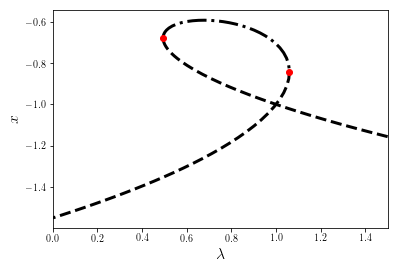

In [33]:
PC['EQ1'].display(('lambda', 'x'), stability=True, linewidth=3)
PC.plot.toggleLabels('off')
PC.plot.fig1.toggleAll('off', bytype=['P','B'])
PC.plot.fig1.axes1.axes.set_xlim((0, 1.5))
PC.plot.fig1.axes1.axes.set_xlabel('$\lambda$', fontsize=16)
PC.plot.fig1.axes1.axes.set_ylabel('$x$', fontsize=16)
PC.plot.fig1.axes1.axes.set_title('')
plt.savefig(dir + 'Example3ExtSysBifX.pdf', bbox_inches='tight')
plt.show()

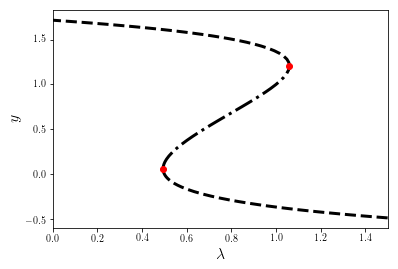

In [34]:
PC['EQ1'].display(('lambda', 'y'), stability=True, linewidth=3)
PC.plot.toggleLabels('off')
PC.plot.fig1.toggleAll('off', bytype=['P','B'])
PC.plot.fig1.axes1.axes.set_xlim((0, 1.5))
PC.plot.fig1.axes1.axes.set_xlabel('$\lambda$', fontsize=16)
PC.plot.fig1.axes1.axes.set_ylabel('$y$', fontsize=16)
PC.plot.fig1.axes1.axes.set_title('')
plt.savefig(dir + 'Example3ExtSysBifY.pdf', bbox_inches='tight')
plt.show()